<a href="https://colab.research.google.com/github/ScottErnst0331/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/R_Scott_Ernst_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












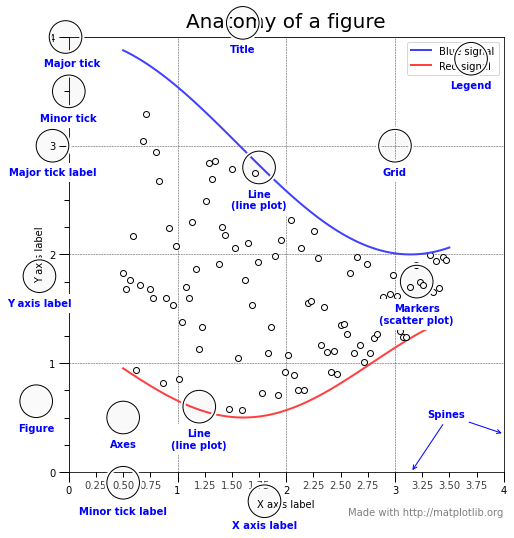

In [0]:
# ASSIGNMENT PART 1) Replicate The Lesson Code

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')

# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()


In [0]:
# Pandas Plotting - Part 1

import pandas as pd

df = pd.DataFrame({'a': [1,3,2,4,3,5], 'b': [3,5,4,6,5,7]})

df.head()

,a,b
0,1,3
1,3,5
2,2,4
3,4,6
4,3,5


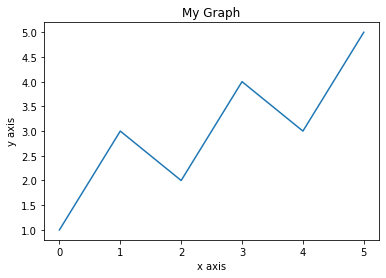

In [0]:
# Pandas Plotting - Part 2

df['a'].plot();
plt.title('My Graph')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

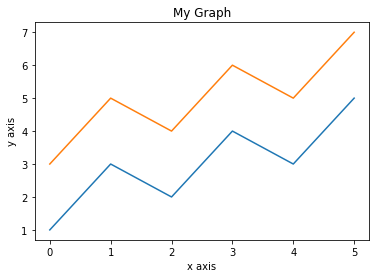

In [0]:
# Syntax Type = Pyplot

import matplotlib.pyplot as plt

plt.plot(df['a'])
plt.plot(df['b'])
plt.title('My Graph')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()


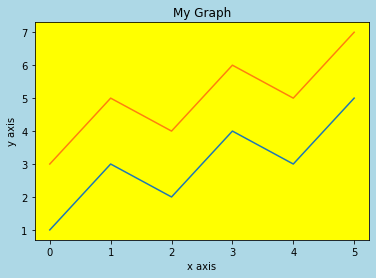

In [0]:
# Syntax Type = Figure Axes

fig, ax = plt.subplots()

ax.plot(df['a'])
ax.plot(df['b'])

fig.patch.set_facecolor('lightblue')

ax.set_facecolor('yellow')

ax.set_title("My Graph")
ax.set_xlabel("x axis")
ax.set_ylabel('y axis')

plt.show()


In [0]:
# Display The Image Of The 538 Graph To Be Reproduced

from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)


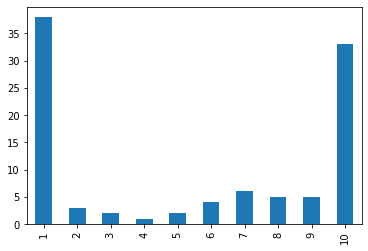

In [0]:
# Prototype #1

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar();


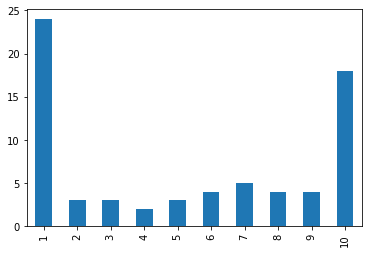

In [0]:
# Prototype #2

fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar();


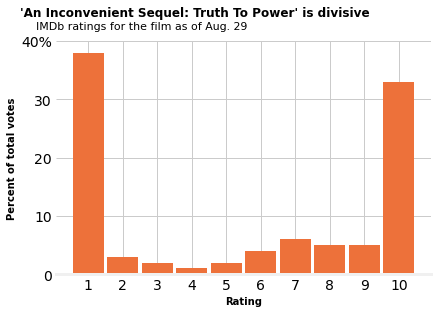

In [0]:
# Replicate The 538 Graph

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

# Turn on the Grid: Change the stylesheet that we're working with

# White figure background
fig.patch.set_facecolor('white')

# White axes background
ax.set_facecolor('white')

# put bars on the chart
ax.bar(x=range(1,11,1), height=fake, color='#ED713A', width=.9)

# Add Title
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", fontsize=12, fontweight='bold', x=.37, y=1.08)

# Add subtitle
ax.text(s='IMDb ratings for the film as of Aug. 29', y=42, x=-.5, fontsize=11)

# set x and y axis labels
ax.set_xlabel('Rating', fontsize=10, fontweight='bold')
ax.set_ylabel('Percent of total votes', fontsize=10, fontweight='bold')

# x axis tick marks and tick lables
ax.set_xticks(range(1,11,1))
ax.set_xticklabels(range(1,11,1))

# y axis tick marks and tick lables
ax.set_yticks(range(0,41,10))
ax.set_yticklabels(['0', '10', '20', '30', '40%'])

# Turn off some of the spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()


In [0]:
# ASSIGNMENT PART 2) Reproduce Another Example From 538's Shared Repository

# Data Frame Chosen Is "rare-pepes"


Here is the 538 web page with the graph 

https://fivethirtyeight.com/features/pepe-the-frog-symbolism-cryptoart-blockchain/


In [0]:
# Display The Image Of The Rare Pepe Prices Graph To Be Reproduced

from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2018/03/roeder-pepe-dankpepe1.png?w=575'
Rare_Pepes = Image(url=url, width=400)

display(Rare_Pepes)


In [0]:
# Load The Python Libraries

import pandas as pd
import matplotlib.pyplot as plt


In [0]:
# Load The Data From My Local Machine

from google.colab import files 
uploaded = files.upload()


Saving pepecash_prices.csv to pepecash_prices.csv


In [0]:
# Read In The csv File

pepecash_prices = pd.read_csv('pepecash_prices.csv')


In [0]:
# Examine The Data Frame

pepecash_prices.head()


,Timestamp,Price
0,1517558400,0.052494
1,1517472000,0.041177
2,1517385600,0.062411
3,1517299200,0.064185
4,1517212800,0.071138


In [0]:
# Convert Timestamp to Date Time format

# Open Item


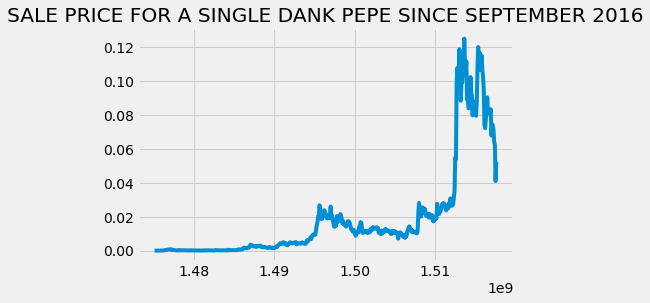

In [0]:
# Create Line Graph Of Rare Pepe Prices

plt.plot(pepecash_prices['Timestamp'], pepecash_prices['Price']);
plt.title('SALE PRICE FOR A SINGLE DANK PEPE SINCE SEPTEMBER 2016');

# The Timestamp Is Causing Problems For Me

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here